# SVM实践作业

## 1.逐行注释案例实现的代码

### 癌症识别案例

In [1]:
import sys    # 引入某一模块
import os     # 操作系统接口模块
import pandas as pd   # 导入pandas
import numpy as np    # 导入numpy

In [2]:
data = pd.read_csv('F:/大三（上）/机器学习/svm实践/data.csv')  # 导入数据
data      # 查看

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
'''1.探索性数据分析'''
data.info()      # 显示数据帧的所有信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.describe()   # 查看数据的基本情况

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
"""2. 类别特征向量化"""
from sklearn import preprocessing   # 导入sklearn库
le = preprocessing.LabelEncoder()   # 标准化标签，将标签值统一转换成range(标签值个数-1)范围内
le.fit(data['diagnosis'])           #训练LabelEncoder
data['diagnosis'] = le.transform(data['diagnosis']) # 使用训练好的LabelEncoder对原数据进行编码

In [6]:
data.head()   # 查看前5行

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
 """3. 提取特征"""
 # 提取所有mean 字段和label字段
data_X = data.filter(regex='_mean')  # 提取均值
data_y = data['diagnosis']           # 提取字段

In [8]:
data_X.head()   # 查看数据前5行

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


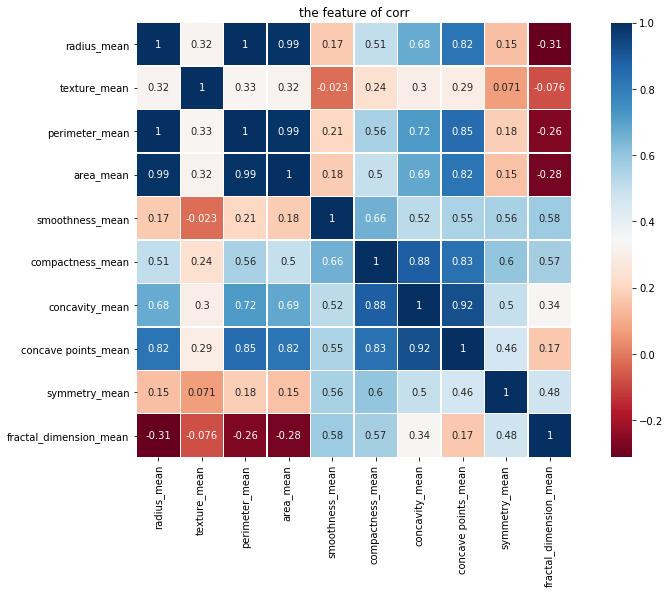

In [9]:
#热力图查看特征之间的关系
import seaborn as sns   # 导入seaborn库
import matplotlib.pyplot as plt    # 导入绘图库
plt.style.use({'figure.figsize':(14, 8)})   # 设置画布
sns.heatmap(data[data_X.columns].corr(), linewidths=0.1, vmax=1.0, square=True,
            cmap=sns.color_palette('RdBu', n_colors=256),
            linecolor='white', annot=True)   # 绘图数据
plt.title('the feature of corr')    # 设置图片标题
plt.show()                       # 图片展示

radius_mean、perimeter_mean和area_mean这三个特征强相关，只保留一个就行了。这里保留热力图里面得分最高的perimeter_mean。

In [10]:
data_X = data_X.drop(['radius_mean', 'area_mean'], axis=1)  # 删除列

In [11]:
"""5. 进行特征归一化/缩放"""
scaler = preprocessing.StandardScaler()   # 数据标准化
data_X = scaler.fit_transform(data_X)     # 先拟合数据，再标准化  
data_X                                # 查看数据

array([[-2.07333501e+00,  1.26993369e+00,  1.56846633e+00, ...,
         2.53247522e+00,  2.21751501e+00,  2.25574689e+00],
       [-3.53632408e-01,  1.68595471e+00, -8.26962447e-01, ...,
         5.48144156e-01,  1.39236330e-03, -8.68652457e-01],
       [ 4.56186952e-01,  1.56650313e+00,  9.42210440e-01, ...,
         2.03723076e+00,  9.39684817e-01, -3.98007910e-01],
       ...,
       [ 2.04557380e+00,  6.72675785e-01, -8.40483881e-01, ...,
         1.05777359e-01, -8.09117071e-01, -8.95586935e-01],
       [ 2.33645719e+00,  1.98252415e+00,  1.52576706e+00, ...,
         2.65886573e+00,  2.13719425e+00,  1.04369542e+00],
       [ 1.22179204e+00, -1.81438851e+00, -3.11208479e+00, ...,
        -1.26181958e+00, -8.20069901e-01, -5.61032377e-01]])

In [12]:
"""6. 模型训练"""
# 切分数据集
from sklearn import model_selection    #导入模型切分函数
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, test_size=0.2,random_state=5)

In [13]:
# 创建SVM分类器
from sklearn.svm import SVC   # 导入SVC函数
model = SVC()    # 模型创建
# 用训练集做训练
model.fit(X_train, y_train)   # 模型训练
# 用测试集做预测
from sklearn import metrics    # 导入模型函数
pred_label = model.predict(X_test)  # 模型预测
print('准确率: ', metrics.accuracy_score(pred_label, y_test))  # 输出模型准确率

准确率:  0.9473684210526315


In [14]:
"""通过网格搜索寻找最优参数"""
from sklearn.model_selection import GridSearchCV  # 导入函数
parameters = {'gamma': np.linspace(0.0001, 0.1),   
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],}  # 设置参数
model = SVC()  # 模型创建
grid_model = GridSearchCV(model, parameters, cv=10, return_train_score=True)  # 模型参数设置
grid_model.fit(X_train, y_train)  # 模型训练
# 用测试集做预测
pred_label = grid_model.predict(X_test)   # 模型预测
print('准确率: ', metrics.accuracy_score(pred_label, y_test))  # 计算准确率
# 输出模型的最优参数
print(grid_model.best_params_)

准确率:  0.956140350877193
{'gamma': 0.07145714285714286, 'kernel': 'rbf'}


In [15]:
model_svm = SVC(gamma=0.07146,kernel='rbf')  # 模型设置
model_svm .fit(X_train, y_train)    # 模型训练
pred_label = model_svm .predict(X_test)   # 模型预测
print('准确率: ', metrics.accuracy_score(pred_label, y_test))  # 计算模型准确率

准确率:  0.956140350877193


### svm的人脸识别

In [22]:
# 导入各种所需库和函数
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC 

In [23]:
print(__doc__)   # 查看说明文档

通过网格搜索寻找最优参数


In [24]:
# 输出进度日志
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

In [25]:
# 下载数据并加载为numpy数组。
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [26]:
# 获得图像数组的形状(用于绘图)
n_samples, h, w = lfw_people.images.shape

In [27]:
lfw_people.images.shape    # 输出图像数据维度

(1288, 50, 37)

<Figure size 1008x576 with 0 Axes>

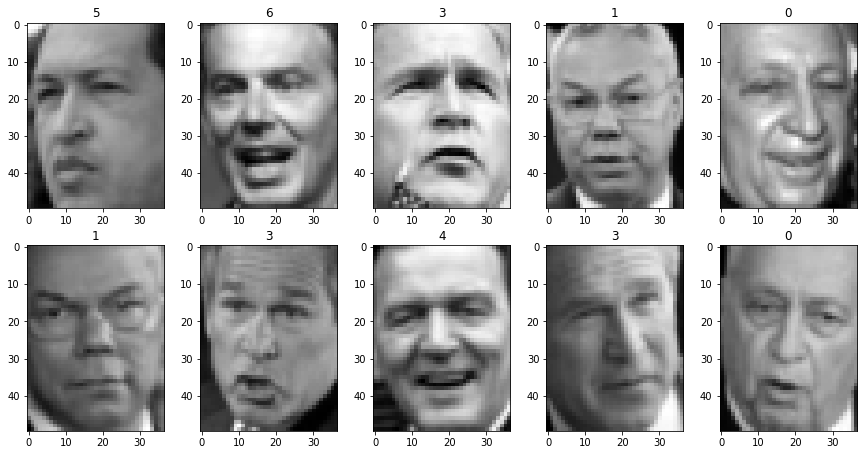

In [28]:
from matplotlib import pyplot as plt   # 导入绘图库
plt.figure()    # 初始化画板
fig,ax=plt.subplots(2,5)      # 设置画板大小
fig.set_figheight(7.5)        # 设置图像高
fig.set_figwidth(15)          # 设置图像宽
ax=ax.flatten()               # 拉伸成一维数组
for i in range(10):
    ax[i].imshow(lfw_people.images[i,:,:],cmap ='gray')  # 灰度设置
    ax[i].set_title(lfw_people.target[i])      # 图像标题设置
plt.show()  # 图像展示

In [29]:
X = lfw_people.data  # 定义
X.shape    # 输出图像形状

(1288, 1850)

In [30]:
n_features = X.shape[1]   # 提取元素

In [31]:
y = lfw_people.target   # 定义y值

In [32]:
target_names = lfw_people.target_names  # 定义数据列名
target_names   # 输出数据

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [33]:
n_classes = target_names.shape[0]   # 选取相应名称

In [39]:
print("Total dataset size:")  # 打印标题
print("n_samples: %d" % n_samples)   # 打印samples
print("n_features: %d" % n_features)   # 打印features
print("n_classes: %d" % n_classes)     # 打印classes

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [36]:
# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [37]:
n_components=150  # 参数设置
# 打印注释
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
t0 = time()   # 初始化运行时间

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train) # 模型训练 
print("done in %0.3fs" % (time() - t0))  # 打印时间差

eigenfaces=pca.components_.reshape((n_components, h, w))    # 将数据重新组织

print("Projecting the input data on the eigenfaces orthonormal basis") # 将输入数据投影到特征面的标准正交基上
t0 = time()   # 初始化运行时间
X_train_pca = pca.transform(X_train)   # 设置训练集
X_test_pca = pca.transform(X_test)     # 设置测试集
print("done in %0.3fs" % (time() - t0))  # 打印时间差

Extracting the top 150 eigenfaces from 966 faces
done in 1.132s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.063s


In [38]:
# 训练SVM分类模型
print("Fitting the classifier to the training set")  # 将分类器匹配到训练集
t0 = time()    # 初始化运行时间
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }  # 参数字典
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)    # 模型设置
clf = clf.fit(X_train_pca, y_train)     # 模型调用
print("done in %0.3fs" % (time() - t0))   # 输出运行时间
print("Best estimator found by grid search:")   # 通过网格搜索找到最佳估计量
print(clf.best_estimator_)   # 模型参数

Fitting the classifier to the training set
done in 82.832s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [40]:
print("Predicting people's names on the test set")  # 预测测试对象的名字
t0 = time()   # 初始化运行时间
y_pred = clf.predict(X_test_pca)  # 模型预测
print("done in %0.3fs" % (time() - t0))   # 输出运行时间
# 报告中显示每个类的精确度，召回率，F1值等信息
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))   # 输出混淆矩阵

Predicting people's names on the test set
done in 0.179s
                   precision    recall  f1-score   support

     Ariel Sharon       0.88      0.54      0.67        13
     Colin Powell       0.80      0.87      0.83        60
  Donald Rumsfeld       0.95      0.70      0.81        27
    George W Bush       0.84      0.98      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.97      0.81      0.88        36

         accuracy                           0.86       322
        macro avg       0.91      0.74      0.80       322
     weighted avg       0.87      0.86      0.85       322

[[  7   1   0   5   0   0   0]
 [  1  52   0   7   0   0   0]
 [  0   3  19   5   0   0   0]
 [  0   3   0 143   0   0   0]
 [  0   1   0   3  20   0   1]
 [  0   4   0   3   1   7   0]
 [  0   1   1   5   0   0  29]]


In [41]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""  # 助手功能，以绘制画廊的肖像
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))   # 设置画板
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)  # 调整子图布局
    for i in range(n_row * n_col):   
        plt.subplot(n_row, n_col, i + 1)  # 布局设置
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)  # 图像变灰
        plt.title(titles[i], size=12)   # 设置图像标题
        plt.xticks(())    # 绘制x轴
        plt.yticks(())    # 绘制y轴

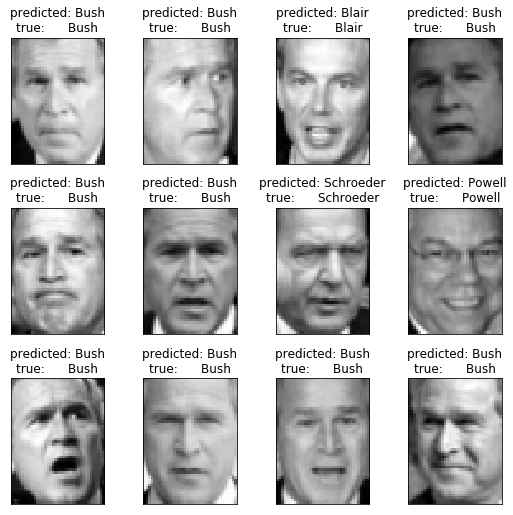

In [42]:
# 绘制部分测试集的预测结果
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]   # 设置预测结果标题
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]   # 设置真实结果标题
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)  # 返回

prediction_titles = [title(y_pred, y_test, target_names, i)   
                     for i in range(y_pred.shape[0])]   # 标题输出

plot_gallery(X_test, prediction_titles, h, w)  # 绘制

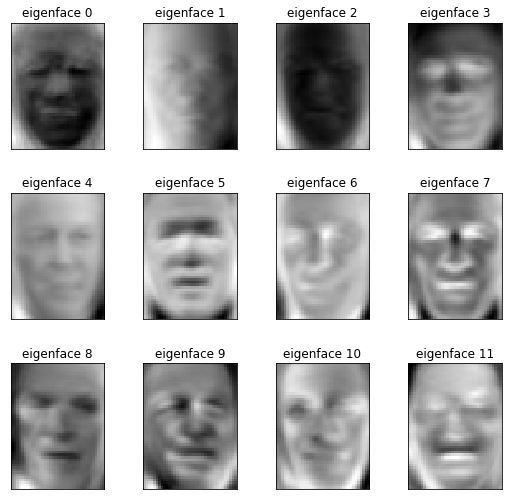

In [43]:
# 绘制几个最重要的特征脸的相册
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])] # 设置标题
plot_gallery(eigenfaces, eigenface_titles, h, w)   # 绘制
plt.show()   # 展示

## 2.比较svm算法与其他分类算法，列出其优缺点（与逻辑回归、KNN、决策树、随机森林等比较）

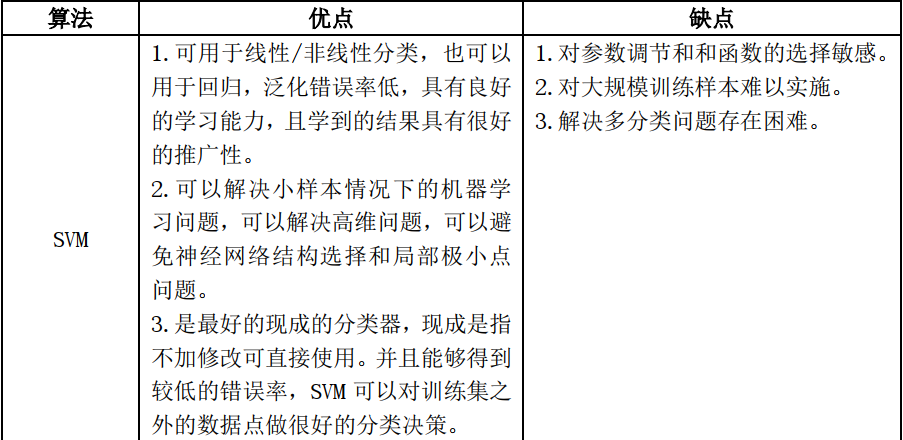

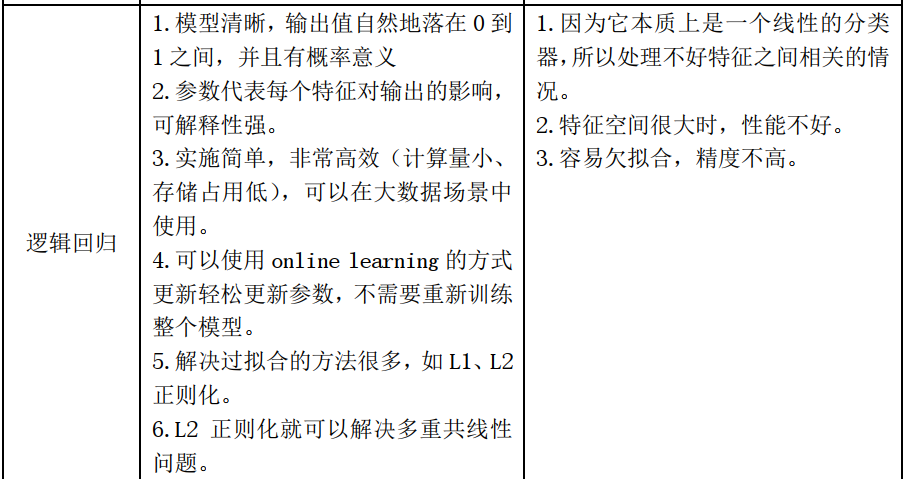

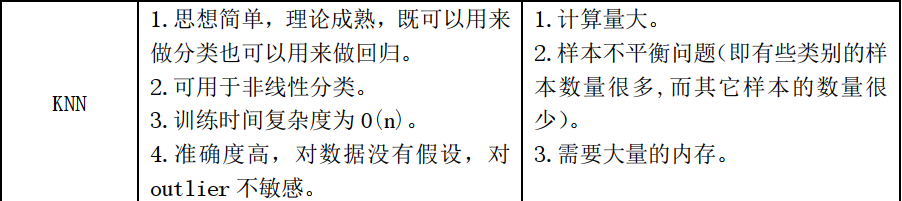

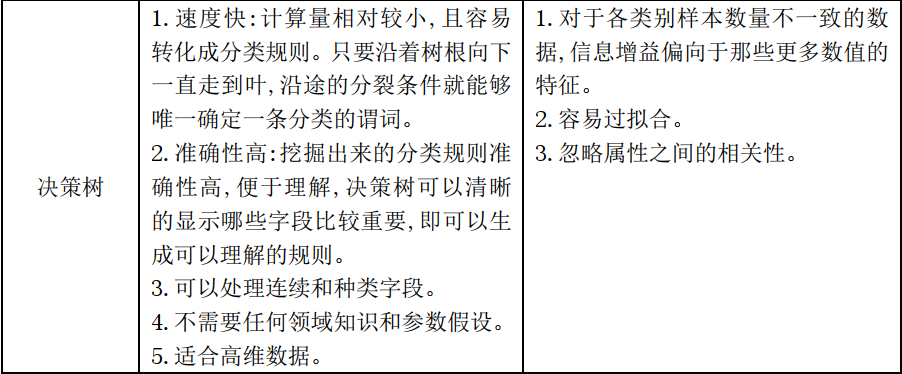

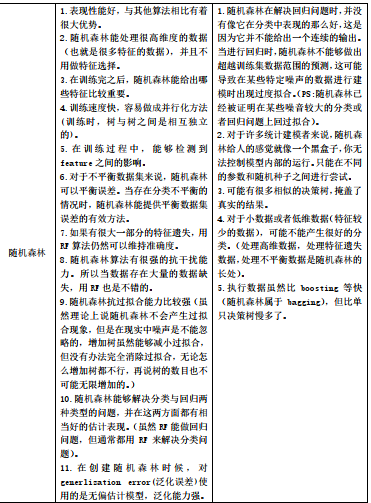

## 3.基于第二个svm人脸识别的案例，三人一组写一篇报告